<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [22]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


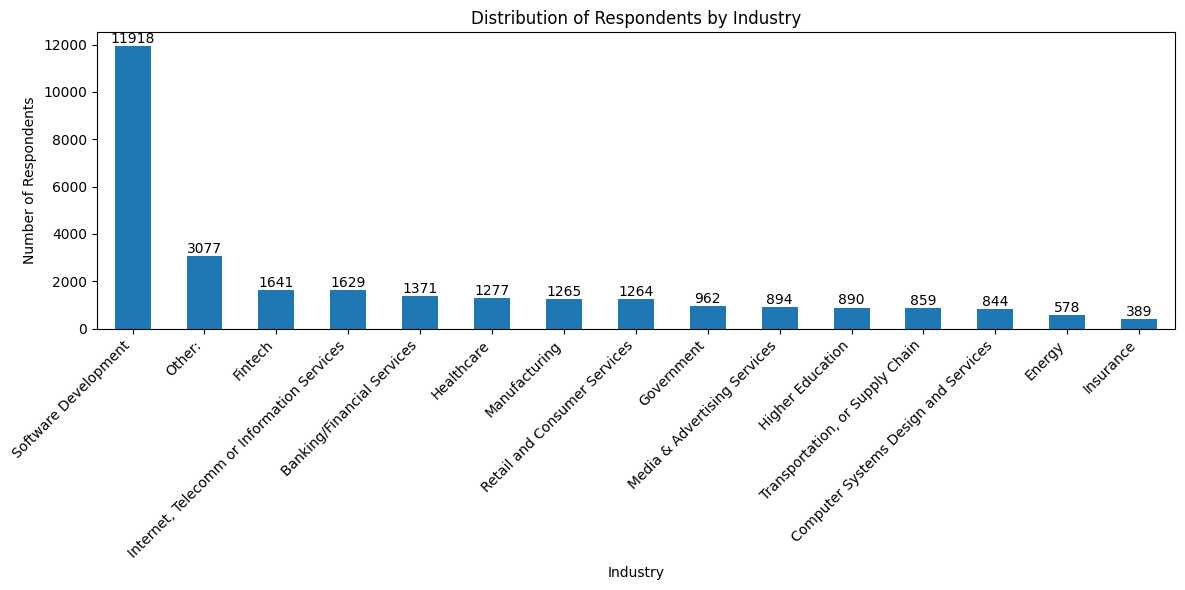


Top 5 industries by respondent count:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Name: count, dtype: int64


In [23]:
# Step 2: Plot the Distribution of Industry
plt.figure(figsize=(12, 6))
industry_counts = df['Industry'].value_counts()
ax = industry_counts.plot(kind='bar')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(industry_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Highlight notable trends
print("\nTop 5 industries by respondent count:")
print(industry_counts.head())

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [24]:
# Step 3: Identify High Compensation Outliers
# Calculate basic statistics for ConvertedCompYearly
comp_stats = df['ConvertedCompYearly'].describe()
print("Compensation Statistics:")
print(comp_stats)

mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

print(f"\nMean compensation: ${mean_comp:,.2f}")
print(f"Median compensation: ${median_comp:,.2f}")
print(f"Standard deviation: ${std_comp:,.2f}")

# Identify compensation values exceeding 3 standard deviations above the mean
threshold = mean_comp + (3 * std_comp)
high_outliers = df[df['ConvertedCompYearly'] > threshold]
print(f"\nNumber of high compensation outliers (3 SD above mean): {len(high_outliers)}")
print("\nHigh compensation outliers (first 10):")

# Display the first column and compensation for outliers
first_column_name = df.columns[0]
print(high_outliers[[first_column_name, 'ConvertedCompYearly']].head(10))

Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Mean compensation: $86,155.29
Median compensation: $65,000.00
Standard deviation: $186,756.97

Number of high compensation outliers (3 SD above mean): 89

High compensation outliers (first 10):
      ResponseId  ConvertedCompYearly
529          530             650000.0
828          829            1000000.0
1932        1933             945000.0
2171        2172             750000.0
2187        2188            2000000.0
2316        2317            1000000.0
2592        2593             800000.0
3024        3025            1302817.0
5934        5935            1031099.0
6735        6736             650000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): $32,712.00
Q3 (75th percentile): $107,971.50
IQR: $75,259.50
Lower bound for outliers: $-80,177.25
Upper bound for outliers: $220,860.75

Number of outliers using IQR method: 978


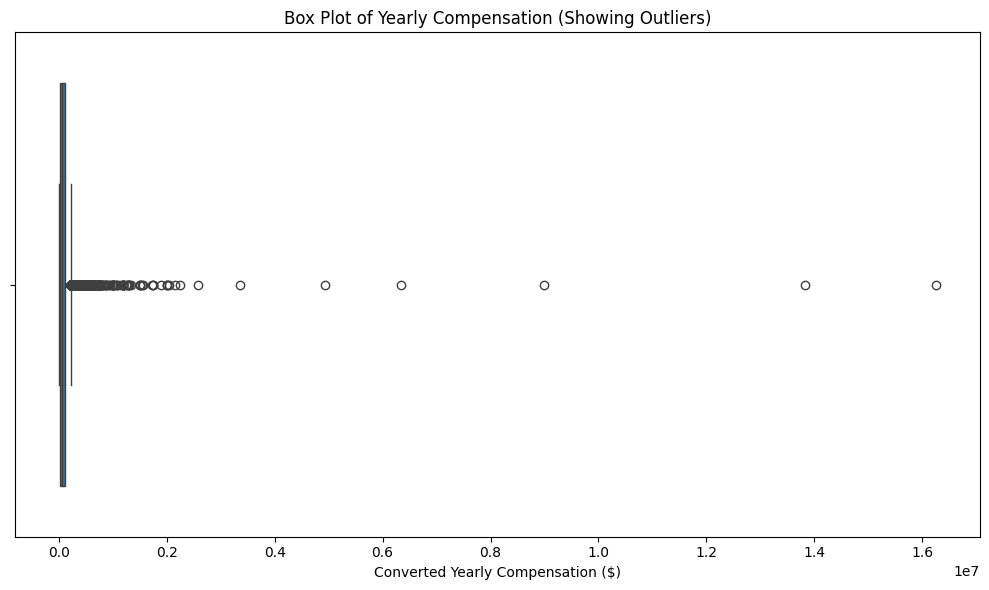

In [25]:
# Step 4: Detect Outliers in Compensation using IQR method
# Calculate IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound for outliers: ${lower_bound:,.2f}")
print(f"Upper bound for outliers: ${upper_bound:,.2f}")

# Count outliers
outliers_iqr = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"\nNumber of outliers using IQR method: {len(outliers_iqr)}")

# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of Yearly Compensation (Showing Outliers)')
plt.xlabel('Converted Yearly Compensation ($)')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [26]:
# Step 5: Remove Outliers and Create a New DataFrame
# Remove outliers from the dataset
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size (without outliers): {df_clean.shape}")
print(f"Number of rows removed: {df.shape[0] - df_clean.shape[0]}")

# Compare statistics before and after removing outliers
print("\nCompensation statistics before removing outliers:")
print(df['ConvertedCompYearly'].describe())

print("\nCompensation statistics after removing outliers:")
print(df_clean['ConvertedCompYearly'].describe())

Original dataset size: (65437, 114)
Cleaned dataset size (without outliers): (22457, 114)
Number of rows removed: 42980

Compensation statistics before removing outliers:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Compensation statistics after removing outliers:
count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Correlation of numeric variables with Age:
Age_Numeric            1.000000
WorkExp                0.845127
ConvertedCompYearly    0.369685
JobSat                 0.067167
CompTotal             -0.021381
JobSatPoints_1        -0.038959
ResponseId            -0.040530
JobSatPoints_6        -0.051358
JobSatPoints_8        -0.051506
JobSatPoints_4        -0.069942
JobSatPoints_7        -0.083425
JobSatPoints_9        -0.083801
JobSatPoints_5        -0.096757
JobSatPoints_11       -0.106586
JobSatPoints_10       -0.111586
Name: Age_Numeric, dtype: float64


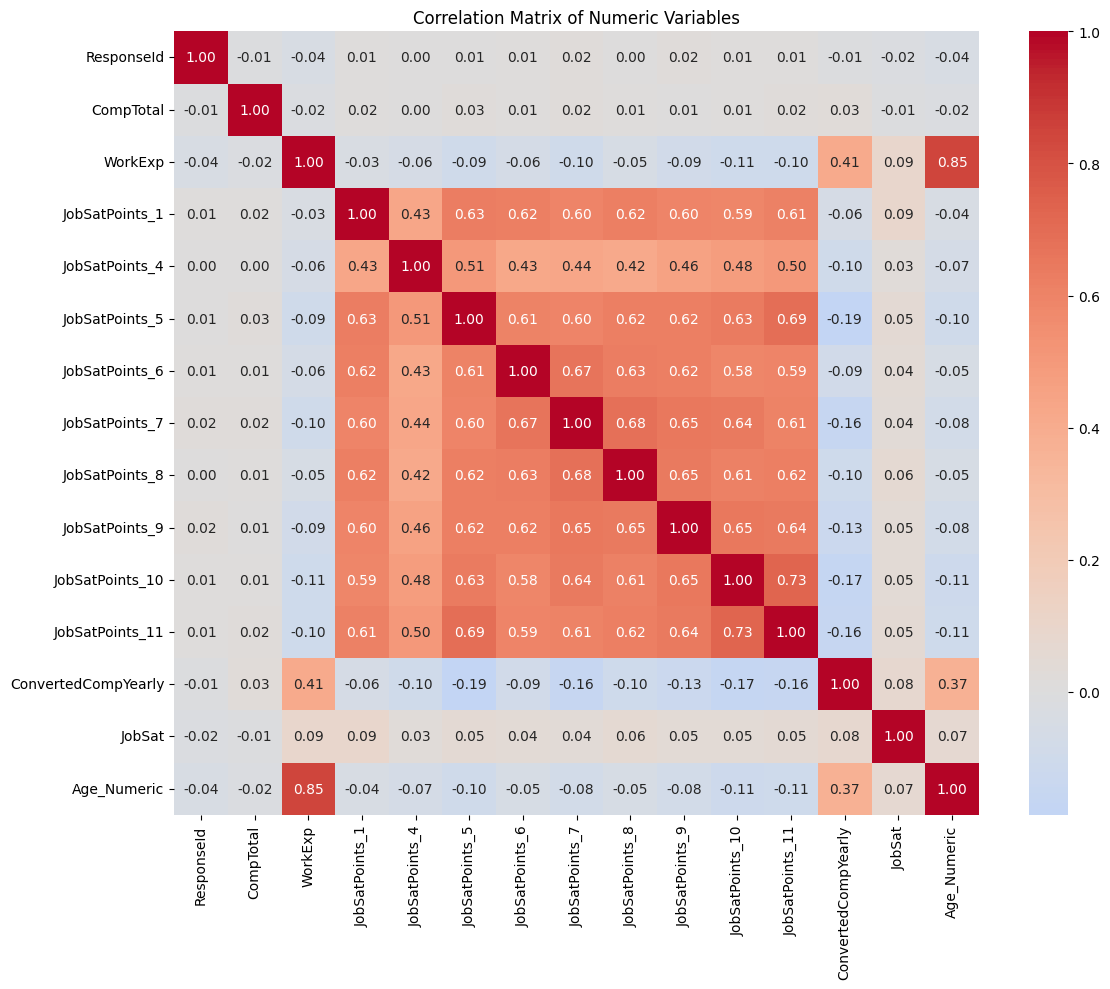


Correlation between Age and Yearly Compensation: 0.370


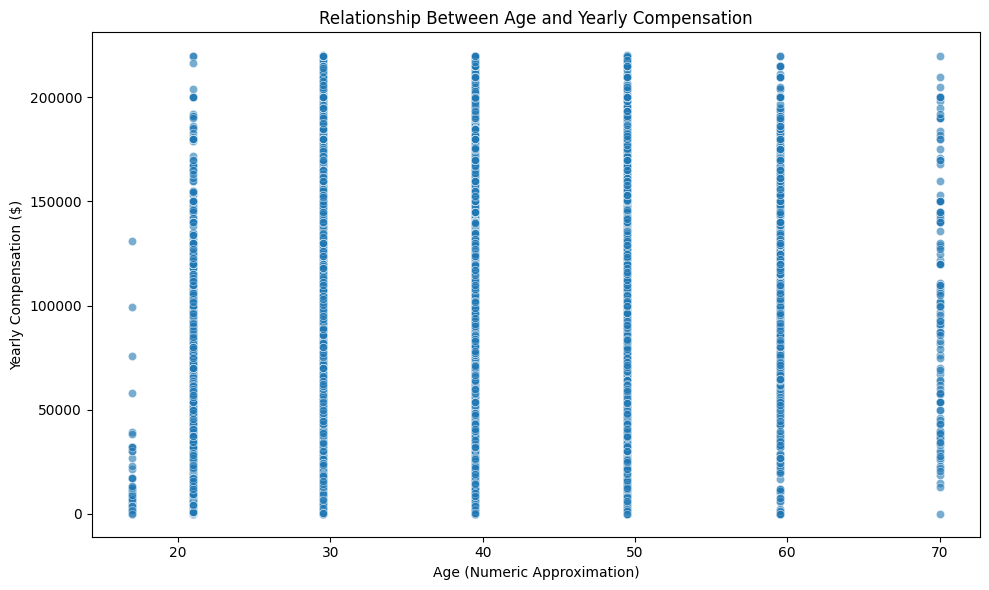

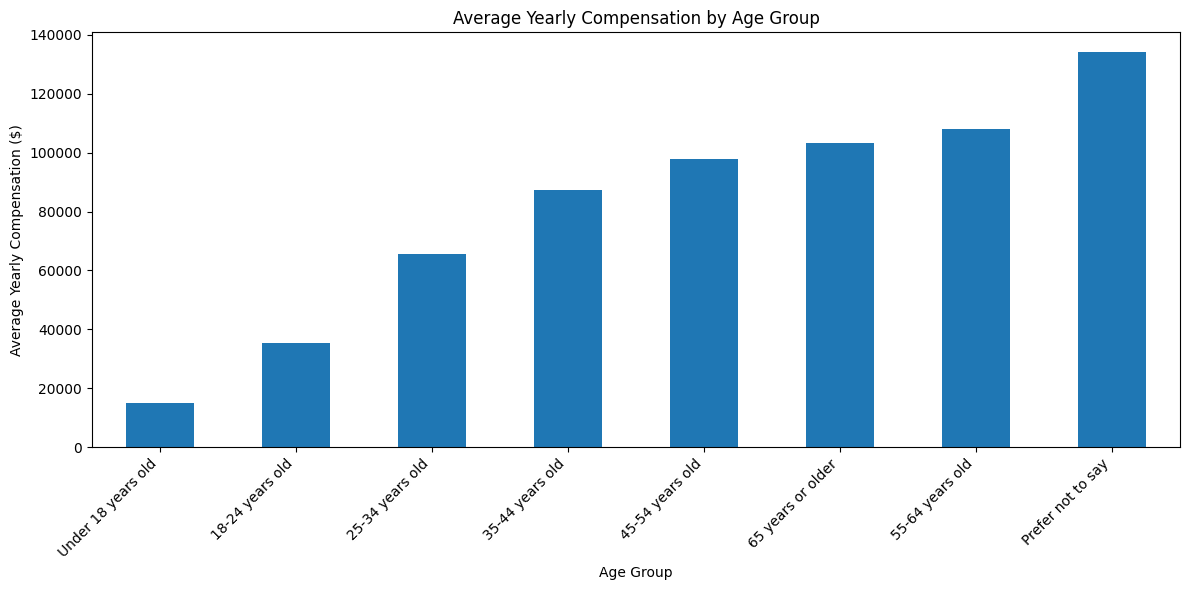

In [28]:
# Step 6: Complete Correlation Analysis (Standalone)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Remove outliers using IQR method (recreate the cleaning process)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

# Map the Age column to approximate numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Create the Age_Numeric column
df_clean.loc[:, 'Age_Numeric'] = df_clean['Age'].map(age_mapping)

# Compute correlations between Age and other numeric variables
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_columns].corr()

# Display correlation with Age
age_correlations = correlation_matrix['Age_Numeric'].sort_values(ascending=False)
print("Correlation of numeric variables with Age:")
print(age_correlations)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Focus on the correlation between Age and ConvertedCompYearly
age_comp_corr = correlation_matrix.loc['Age_Numeric', 'ConvertedCompYearly']
print(f"\nCorrelation between Age and Yearly Compensation: {age_comp_corr:.3f}")

# Create a scatter plot to visualize this relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_Numeric', y='ConvertedCompYearly', data=df_clean, alpha=0.6)
plt.title('Relationship Between Age and Yearly Compensation')
plt.xlabel('Age (Numeric Approximation)')
plt.ylabel('Yearly Compensation ($)')
plt.tight_layout()
plt.show()

# Additional analysis: Show compensation by age group
plt.figure(figsize=(12, 6))
comp_by_age = df_clean.groupby('Age')['ConvertedCompYearly'].mean().sort_values()
comp_by_age.plot(kind='bar')
plt.title('Average Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Yearly Compensation ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
